## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Reading the data

In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

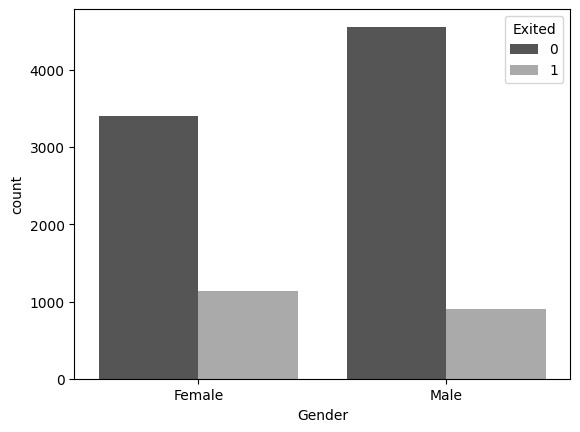

In [4]:
sns.countplot(x=df['Gender'], hue=df['Exited'], palette='gray')

<Axes: xlabel='Gender', ylabel='Age'>

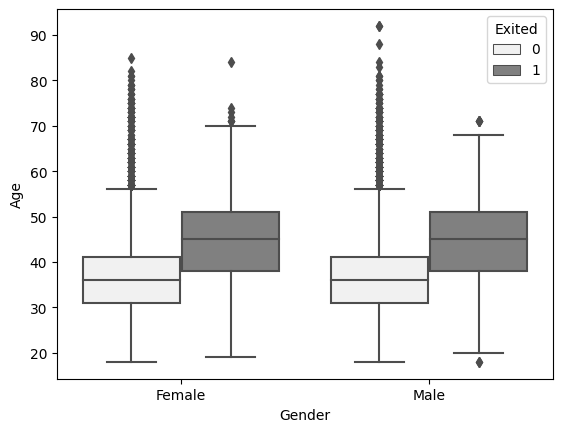

In [5]:
sns.boxplot(x=df['Gender'], y=df['Age'], hue=df['Exited'], color='gray')

<Axes: xlabel='Geography', ylabel='Age'>

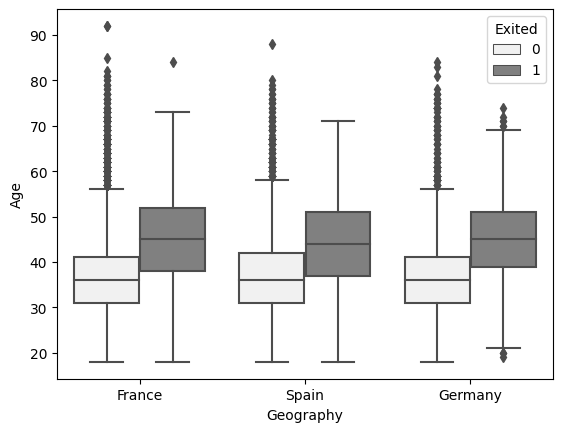

In [6]:
sns.boxplot(x=df['Geography'], y=df['Age'], hue=df['Exited'], color='gray')

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

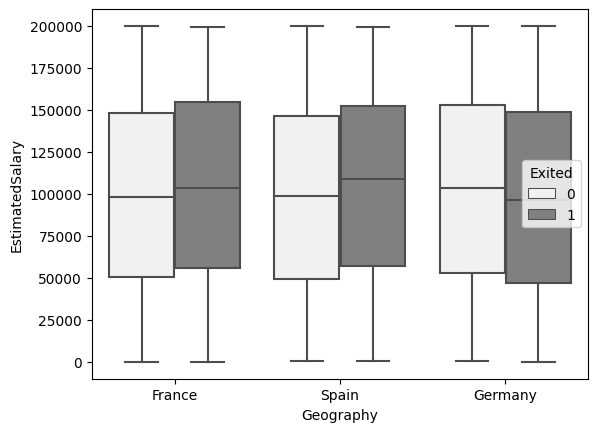

In [7]:
sns.boxplot(x=df['Geography'], y=df['EstimatedSalary'], hue=df['Exited'], color='grey')

<Axes: xlabel='Geography', ylabel='Balance'>

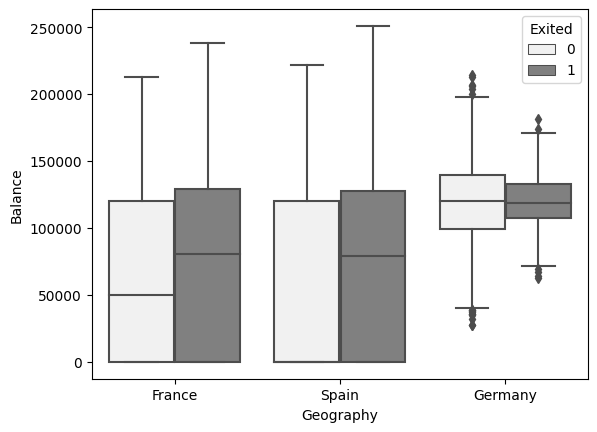

In [8]:
sns.boxplot(x=df['Geography'], y=df['Balance'], hue=df['Exited'], color='grey')

<Axes: xlabel='Geography', ylabel='CreditScore'>

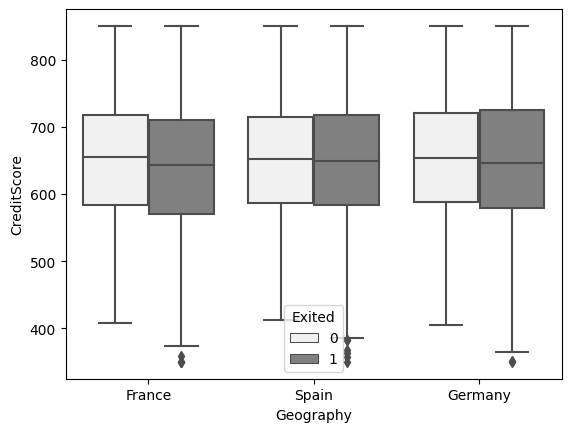

In [9]:
sns.boxplot(x=df['Geography'], y=df['CreditScore'], hue=df['Exited'], color='grey')

## Feature Engineering

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)
df.drop('Gender', inplace=True, axis=1)

In [11]:
country = pd.get_dummies(df['Geography'])
df = pd.concat([df, country], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [12]:
df.corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Male              -0.106512
France            -0.104955
Germany            0.173488
Spain             -0.052667
Name: Exited, dtype: float64

<Axes: >

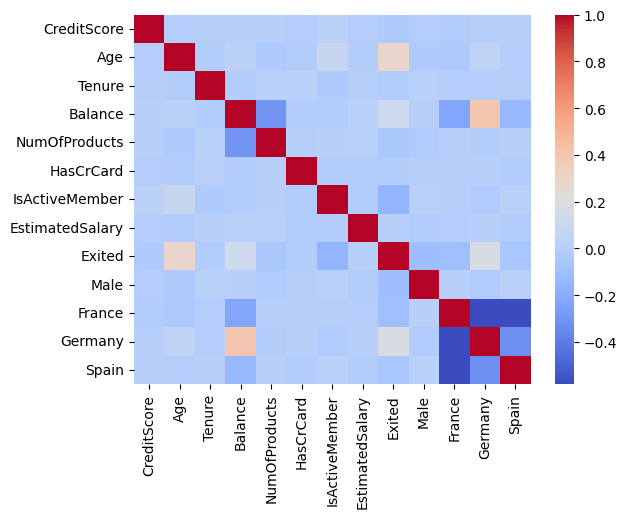

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm')

## Creating train and test dataframes

In [14]:
X = df.drop('Exited', axis=1)
y = df.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creating models 

# Logistic Regression

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, predictions_logreg))
print(classification_report(y_test, predictions_logreg))

[[2328   47]
 [ 603   22]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2375
           1       0.32      0.04      0.06       625

    accuracy                           0.78      3000
   macro avg       0.56      0.51      0.47      3000
weighted avg       0.70      0.78      0.71      3000



# Decision Tree

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_dtree = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions_dtree))
print(classification_report(y_test, predictions_dtree))

[[2081  294]
 [ 309  316]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2375
           1       0.52      0.51      0.51       625

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



# Random Forest

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

[[2304   71]
 [ 343  282]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2375
           1       0.80      0.45      0.58       625

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



# K-Means Clustring

In [18]:
kmeans = KMeans(n_clusters=2, n_init=100)
kmeans.fit(X)
print(confusion_matrix(kmeans.labels_, y))
print(classification_report(kmeans.labels_, y))

[[4708 1492]
 [3255  545]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.66      6200
           1       0.27      0.14      0.19      3800

    accuracy                           0.53     10000
   macro avg       0.43      0.45      0.43     10000
weighted avg       0.47      0.53      0.48     10000



# Creating a Neural Network

In [19]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

In [21]:
model.fit(x=np.array(X_train.drop(['France', 'Germany', 'Spain', 'Male'], axis=1)), 
          y=y_train.values, 
          epochs=60,
          validation_data=(np.array(X_test.drop(['France', 'Germany', 'Spain', 'Male'], axis=1)), y_test.values), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/60
219/219 [==============================] - 2s 3ms/step - loss: 0.5586 - accuracy: 0.7834 - val_loss: 0.5397 - val_accuracy: 0.7917
Epoch 2/60
219/219 [==============================] - 1s 2ms/step - loss: 0.5230 - accuracy: 0.7983 - val_loss: 0.5224 - val_accuracy: 0.7917
Epoch 3/60
219/219 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.7983 - val_loss: 0.5142 - val_accuracy: 0.7917
Epoch 4/60
219/219 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7983 - val_loss: 0.5101 - val_accuracy: 0.7917
Epoch 5/60
219/219 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7983 - val_loss: 0.5077 - val_accuracy: 0.7917
Epoch 6/60
219/219 [==============================] - 1s 2ms/step - loss: 0.4985 - accuracy: 0.7983 - val_loss: 0.5062 - val_accuracy: 0.7917
Epoch 7/60
219/219 [==============================] - 1s 2ms/step - loss: 0.4974 - accuracy: 0.7983 - val_loss: 0.5053 - val_accuracy: 0.7917
Epoch 

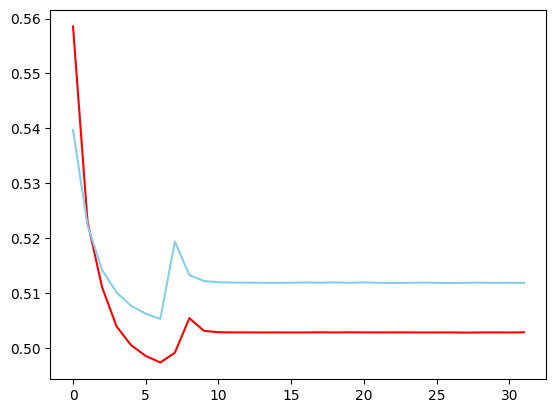

In [22]:
plt.plot(model.history.history['loss'], color='red')
plt.plot(model.history.history['val_loss'], color='skyblue')

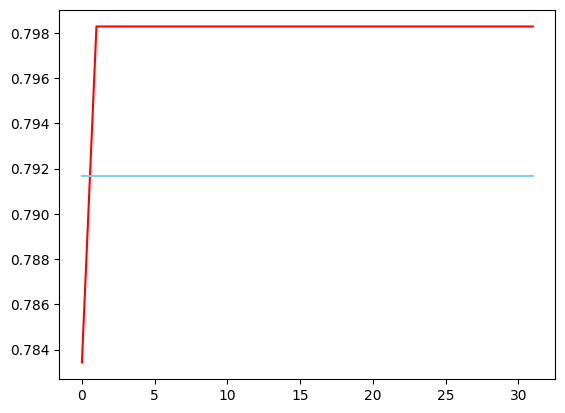

In [23]:
plt.plot(model.history.history['accuracy'], color='red')
plt.plot(model.history.history['val_accuracy'], color='skyblue')

In [24]:
model_predictions = model.predict(X_test.drop(['France', 'Germany', 'Spain', 'Male'], axis=1))
model_predictions = (model_predictions>0.5)
print(confusion_matrix(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

94/94 [==============================] - 0s 1ms/step
[[2375    0]
 [ 625    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2375
           1       0.00      0.00      0.00       625

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
